In [1]:
import os.path
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torchvision.transforms import functional as F
import pandas as pd
import glob

In [49]:

paths = "./datasets/test/"
a = glob.glob(paths)
labels = [i for i in range(34)]
df = pd.DataFrame(columns=["image_path", "label"])
for label in labels:
    b = glob.glob(paths + str(label) + "/*.png")
    for img_path in b:
        a = pd.DataFrame({"image_path": [img_path], "label": [label]})
        df = pd.concat([df, a], ignore_index=True)
print(df)
df.to_csv("./datasets/test.csv", index=False)

                           image_path label
0      ./datasets/test/0\syn00002.png     0
1      ./datasets/test/0\syn00065.png     0
2      ./datasets/test/0\syn00167.png     0
3      ./datasets/test/0\syn00210.png     0
4      ./datasets/test/0\syn00218.png     0
...                               ...   ...
6635  ./datasets/test/33\syn06187.png    33
6636  ./datasets/test/33\syn06448.png    33
6637  ./datasets/test/33\syn06482.png    33
6638  ./datasets/test/33\syn06526.png    33
6639  ./datasets/test/33\syn06534.png    33

[6640 rows x 2 columns]


In [2]:
data_dir = "./datasets/"  # 데이터 디렉토리 경로
train = os.path.join(data_dir, 'train.csv')  # 훈련 데이터 디렉토리 경로
test = os.path.join(data_dir, 'test.csv')  # 테스트 데이터 디렉토리 경로
train_df = pd.read_csv(train)  # 훈련 데이터셋 데이터프레임 파일
test_df = pd.read_csv(test)  # 테스트 데이터셋 데이터프레임 파일

In [3]:

# GPU를 사용할 수 있는 경우, device를 'cuda'로 설정
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [4]:
device

device(type='cuda')

In [ ]:
# Image.open("./datasets/test/33\syn06534.png").convert("RGB")
a = cv2.imread("./datasets/test/33\syn06534.png")
b = cv2.cvtColor(a, cv2.COLOR_BGR2RGB)
plt.imshow(b)

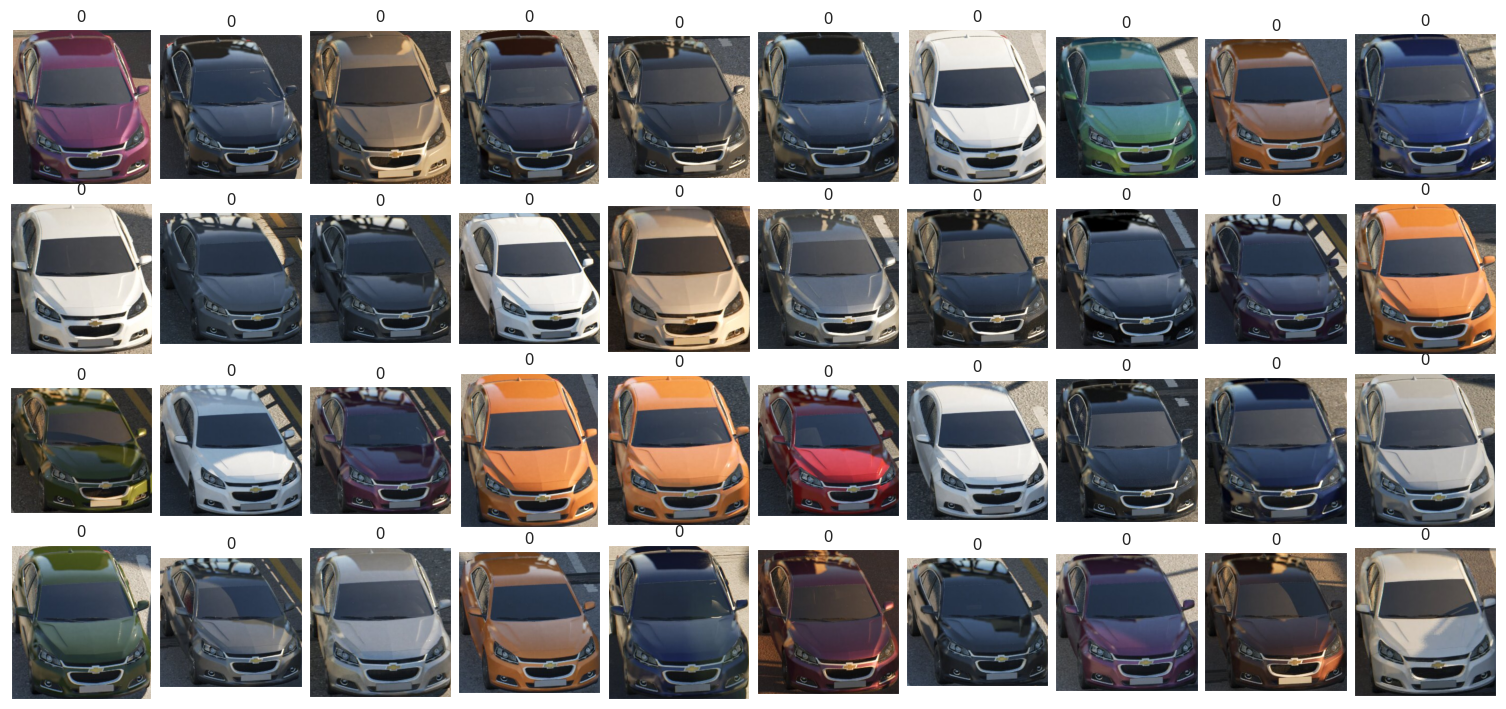

In [5]:

# 데이터 확인
fig, axes = plt.subplots(nrows=4, ncols=10, figsize=(15, 7),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(train_df.image_path[i]))
    ax.set_title(train_df.label[i], fontsize = 12)
plt.tight_layout(pad=0.5)
plt.show()

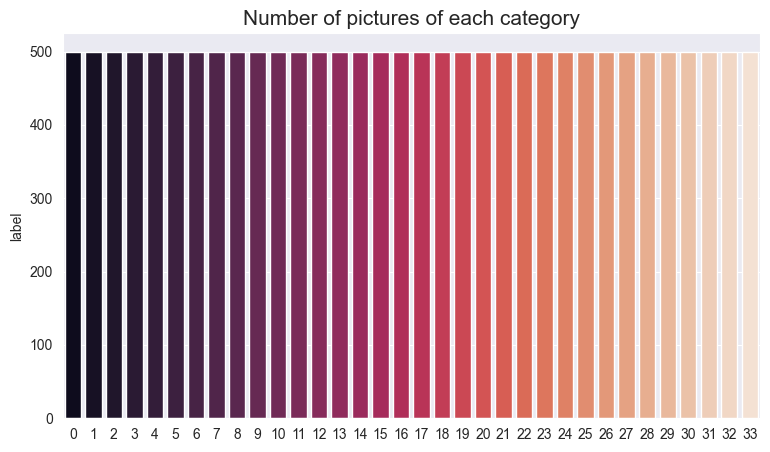

In [6]:

vc = train_df['label'].value_counts()
plt.figure(figsize=(9,5))
sns.barplot(x = vc.index, y = vc, palette = "rocket")
plt.title("Number of pictures of each category", fontsize = 15)
plt.show()

In [25]:

# 변환 및 데이터셋 설정
# crop_augmented_transform = transforms.Compose([
#     transforms.AutoAugment(transforms.AutoAugmentPolicy.SVHN),
#     transforms.ToTensor(),
#     transforms.Resize((400, 400)),
#     transforms.Lambda(lambda img: F.crop(img, top=250, left=50, height=150, width=350)),
#
#     transforms.Resize((400, 400)),
# ])

crop_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((400, 400)),
    transforms.Lambda(lambda img: F.crop(img, top=250, left=50, height=150, width=350)),
    transforms.Resize((400, 400)),
])

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((400, 400)),
])

# augmented_transform = transforms.Compose([
#     transforms.AutoAugment(transforms.AutoAugmentPolicy.SVHN),
#     transforms.ToTensor(),
#     transforms.Resize((400, 400)),
# ])

# 이미지 확인하기

Image shape: torch.Size([3, 400, 400])


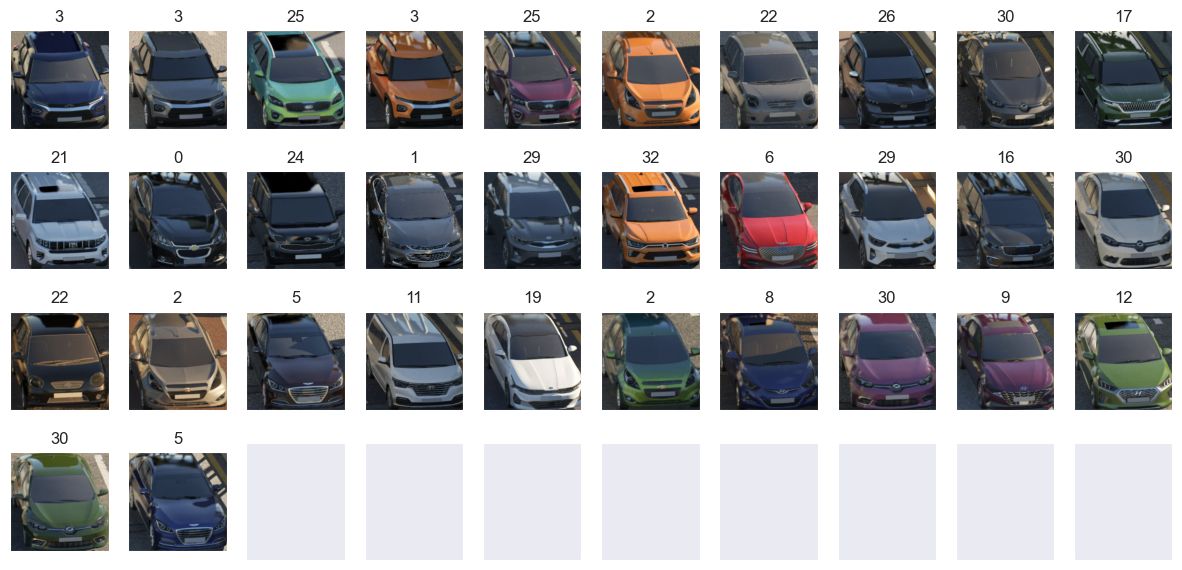

In [42]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

def load_and_show_images(root_path, transform, batch_size, nrows=4, ncols=10):
    # 데이터셋 로드
    dataset = datasets.ImageFolder(root=root_path, transform=transform)

    # 데이터로더 설정
    data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 1개의 배치를 추출합니다.
    images, labels = next(iter(data_loader))

    # 이미지의 shape을 확인합니다.
    print(f'Image shape: {images[0].shape}')  # 출력 예: [3, 292, 298]

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 7),
                             subplot_kw={'xticks': [], 'yticks': []})

    for i, ax in enumerate(axes.flat):
        # 너무 많은 이미지를 그리려고 하는 경우를 대비합니다.
        if i >= len(images):
            break
        ax.set_title(inverted_dict[labels[i].item()], fontsize=12)
        ax.imshow(images[i].permute(1, 2, 0))

    plt.show()

# 이 함수를 호출하려면 다음과 같이 하면 됩니다.
data_augmentation = transforms.Compose([
    # 여기에 원하는 변환들을 추가하세요
    transforms.ToTensor(),
    transforms.Resize((400,400)),
])

load_and_show_images('./datasets/train', data_augmentation, batch_size=32)


In [41]:
label_dict = dataset.class_to_idx
inverted_dict = {v: k for k, v in label_dict.items()}
inverted_dict

{0: '0',
 1: '1',
 2: '10',
 3: '11',
 4: '12',
 5: '13',
 6: '14',
 7: '15',
 8: '16',
 9: '17',
 10: '18',
 11: '19',
 12: '2',
 13: '20',
 14: '21',
 15: '22',
 16: '23',
 17: '24',
 18: '25',
 19: '26',
 20: '27',
 21: '28',
 22: '29',
 23: '3',
 24: '30',
 25: '31',
 26: '32',
 27: '33',
 28: '4',
 29: '5',
 30: '6',
 31: '7',
 32: '8',
 33: '9'}

In [26]:

from torch.utils.data import Dataset, DataLoader, random_split
from torch.utils.data import ConcatDataset

dataset = datasets.ImageFolder(root='./datasets/train', transform=transform)
# augmented_dataset = datasets.ImageFolder(root='./datasets/train', transform=augmented_transform)
# augmented_crop_dataset = datasets.ImageFolder(root='./datasets/train', transform=crop_augmented_transform)
crop_dataset = datasets.ImageFolder(root='./datasets/train', transform=crop_transform)

# Assuming `dataset` is your original dataset
combined_dataset = ConcatDataset([dataset, crop_dataset])

dataset_size = len(combined_dataset)
train_size = int(dataset_size * 0.6)
validation_size = int(dataset_size * 0.2)
test_size = dataset_size - train_size - validation_size

print(train_size, validation_size, test_size)

train_dataset, validation_dataset, test_dataset = random_split(combined_dataset, [train_size, validation_size, test_size])

print(f"Training Data Size : {len(train_dataset)}")
print(f"Validation Data Size : {len(validation_dataset)}")
print(f"Testing Data Size : {len(test_dataset)}")

train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True, drop_last=True)
validation_dataloader = DataLoader(validation_dataset, batch_size=16, shuffle=True, drop_last=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True, drop_last=True)



20400 6800 6800
Training Data Size : 20400
Validation Data Size : 6800
Testing Data Size : 6800


In [27]:
import torch
import torch.nn as nn
from torchvision.models import resnet50
# ResNet50 model
class ResNet50(nn.Module):
    def __init__(self, num_classes):
        super(ResNet50, self).__init__()
        self.base_model = resnet50(pretrained=True)
        num_features = self.base_model.fc.in_features
        self.base_model.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.base_model(x)


In [45]:
model = torch.load('./model/Resnet50augmented(temp).pt')


In [46]:

from torch.optim.lr_scheduler import ReduceLROnPlateau
from tqdm import tqdm

# 학습 함수
def train(model, train_dataloader, val_dataloader, criterion, optimizer, scheduler, device, num_epochs, patience):
    best_val_loss = float('inf')
    early_stop_counter = 0

    for epoch in range(num_epochs):
        train_loss = 0.0
        val_loss = 0.0

        # 훈련 과정
        model.train()
        for images, labels in tqdm(train_dataloader, desc=f"Epoch {epoch + 1} - Training"):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item() * images.size(0)

        # 검증 과정
        model.eval()
        with torch.no_grad():
            for images, labels in tqdm(val_dataloader, desc=f"Epoch {epoch + 1} - Validation"):
                images = images.to(device)
                labels = labels.to(device)

                outputs = model(images)
                loss = criterion(outputs, labels)

                val_loss += loss.item() * images.size(0)

        # 손실 계산
        train_loss = train_loss / len(train_dataloader.dataset)
        val_loss = val_loss / len(val_dataloader.dataset)

        # 얼리 스톱 체크
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print(f"Early stopping at epoch {epoch + 1} as validation loss has not improved for {patience} epochs.")
                break

        # 학습률 스케줄링
        scheduler.step(val_loss)

        # 에폭별 결과 출력
        print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}")

num_classes=34
# 모델 초기화
# model = ResNet50(num_classes)
model.to(device)

# 손실 함수, 옵티마이저, 스케줄러 초기화
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
scheduler = ReduceLROnPlateau(optimizer, patience=2, factor=0.1)

# 학습 함수 호출
train(model, train_dataloader, validation_dataloader, criterion, optimizer, scheduler, device, num_epochs=30, patience=3)


Epoch 1 - Validation: 100%|██████████| 425/425 [00:59<00:00,  7.18it/s]


Epoch 1 - Train Loss: 0.0166 | Val Loss: 0.0062


Epoch 2 - Validation: 100%|██████████| 425/425 [00:58<00:00,  7.29it/s]


Epoch 2 - Train Loss: 0.0204 | Val Loss: 0.0017


Epoch 3 - Validation: 100%|██████████| 425/425 [00:58<00:00,  7.21it/s]


Epoch 3 - Train Loss: 0.0178 | Val Loss: 0.0074


Epoch 4 - Validation: 100%|██████████| 425/425 [00:57<00:00,  7.39it/s]


Epoch 4 - Train Loss: 0.0159 | Val Loss: 0.0079


Epoch 5 - Validation: 100%|██████████| 425/425 [00:57<00:00,  7.37it/s]

Early stopping at epoch 5 as validation loss has not improved for 3 epochs.


In [47]:
# 가중치 저장
torch.save(model, 'Resnet50augmented(temp).pt')


In [36]:
import os
import torch
from torchvision import transforms
from PIL import Image
import glob
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 변환 및 전처리 설정
transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor()
])
test_data_path = glob.glob("./datasets/test/11/*")
# 예측 함수
# 예측 함수
def predict_image(model, image_path):
    image = Image.open(image_path).convert('RGB')
    image = transform(image).unsqueeze(0)
    image = image.to(device)  # 입력 데이터를 GPU로 이동
    with torch.no_grad():
        output = model(image)
    _, predicted = torch.max(output, 1)
    return predicted.item()

# CUDA 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 로드 및 CUDA로 이동
model.to(device)
model.eval()
b = []
# test_data_path 내의 파일들에 대해 예측 수행
for file_path in test_data_path:
    prediction = predict_image(model, file_path)
    print(f"Prediction: {prediction}")
    b.append(prediction)

Prediction: 7
Prediction: 16
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 32
Prediction: 16
Prediction: 33
Prediction: 33
Prediction: 33
Prediction: 1
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 5
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 25
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 6
Prediction: 11
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 27
Prediction: 11
Prediction: 7
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 33


In [38]:
import torch
from torchvision import transforms
from PIL import Image
import glob
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 변환 및 전처리 설정
transform = transforms.Compose([
    transforms.Resize((400, 400)),
    transforms.ToTensor()
])
test_data_path = glob.glob("./datasets/test/11/*")
# 예측 함수
def predict_image(model, image_path):
    image = cv2.imread(image_path, cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = transform(image).unsqueeze(0)
    image = image.to(device)  # 입력 데이터를 GPU로 이동
    with torch.no_grad():
        output = model(image)
    _, predicted = torch.max(output, 1)
    return predicted.item()


# CUDA 디바이스 설정
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 모델 로드 및 CUDA로 이동
model.to(device)
model.eval()
a = []
# test_data_path 내의 파일들에 대해 예측 수행
for file_path in test_data_path:
    prediction = predict_image(model, file_path)
    print(f"Prediction: {prediction}")
    a.append(prediction)


Prediction: 7
Prediction: 0
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 32
Prediction: 28
Prediction: 33
Prediction: 33
Prediction: 33
Prediction: 0
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 33
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 5
Prediction: 11
Prediction: 11
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 25
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 16
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 6
Prediction: 11
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 11
Prediction: 33
Prediction: 11
Prediction: 27
Prediction: 11
Prediction: 7
Prediction: 33
Prediction: 33
Prediction: 11
Prediction: 33
P

In [ ]:
for i in range(len(a)):
    if a[i] != b[i]:
        print(a[i])